In [93]:
#import dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
#sets plot styles to match jupyter theme
jtplot.style('grade3')

# Set the folder path where the CSV files are located
folderpath = 'game_data_watched'

# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(folderpath) if f.endswith('.csv')]

# Loop through each CSV file and read it into a DataFrame
dfs = []
for csv_file in csv_files:
    file_path = os.path.join(folderpath, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
category_df = pd.concat(dfs, ignore_index=True)

In [95]:
category_df.head()

,Year,Game,Watch time (mins),Stream time (mins),Peak viewers,Peak channels,Streamers,Average viewers,Average channels,Average viewer ratio,Language
0,2018,League of Legends,2678686860,30452220,108695,204,20150,5097,57,87.96,Chinese
1,2018,Hearthstone,1741260840,4863600,37559,85,4988,3313,9,358.02,Chinese
2,2018,Music,1603313160,2318040,13085,11,699,3050,4,691.67,Chinese
3,2018,PUBG: BATTLEGROUNDS,1451157480,24016320,47270,225,16890,2761,45,60.42,Chinese
4,2018,IRL,1284889440,11018040,28782,109,9692,2444,20,116.62,Chinese


In [96]:
#iolsate total watch time
language_year = category_df.groupby(['Year','Language']).sum()
language_year_df = pd.DataFrame(language_year).reset_index()
language_year_df.head()

,Year,Language,Watch time (mins),Stream time (mins),Peak viewers,Peak channels,Streamers,Average viewers,Average channels,Average viewer ratio
0,2018,Chinese,14522668320,176056800,1264214,3965,148184,27580,292,19019.69
1,2018,English,256978524960,6913397160,15850235,111303,11218666,488933,13106,11209.68
2,2018,Korean,29420214000,384766920,2442234,7807,303562,55927,684,17372.13
3,2018,Portuguese,20202113580,319068660,2370183,5017,528953,38393,568,23329.76
4,2019,Chinese,15923881020,216772680,1389825,5574,153572,30246,371,14933.59


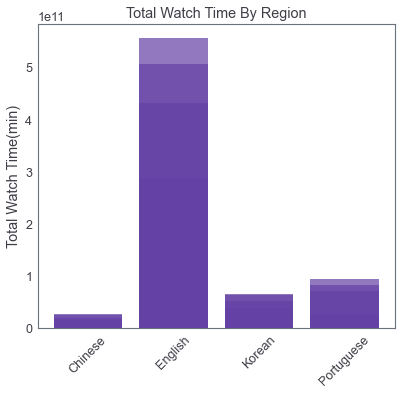

In [97]:
#bar graph for total watch time
#make the year side by side somehow??
x_axis = language_year_df['Language']
y_axis = language_year_df['Watch time (mins)']

fig1 = plt.bar(x_axis,y_axis,color = "#6441A5", alpha = 0.70)
plt.xticks(rotation =45)

plt.title('Total Watch Time By Region')
plt.ylabel('Total Watch Time(min)')
plt.grid()

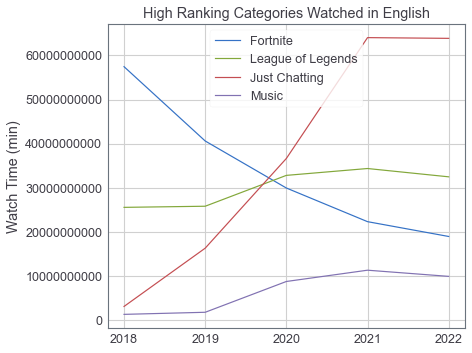

In [98]:
#grab yearly data for the english games
top1_eng = category_df[category_df['Game'] == 'Fortnite'].sort_values(by = "Year", ascending = False)
top1_eng = top1_eng.loc[top1_eng['Language'] == 'English']

top2_eng = category_df[category_df['Game'] =='League of Legends'].sort_values(by = "Year", ascending = False)
top2_eng = top2_eng.loc[top2_eng['Language'] == 'English']

top3_eng = category_df[category_df['Game'] == 'Just Chatting'].sort_values(by = "Year", ascending = False)
top3_eng = top3_eng.loc[top3_eng['Language'] == 'English']

top4_eng = category_df[category_df['Game'] == 'Music'].sort_values(by = "Year", ascending = False)
top4_eng = top4_eng.loc[top4_eng['Language'] == 'English']

#plot it all

fig2, ax =plt.subplots(sharex= True)
ax.plot(top1_eng['Year'],top1_eng['Watch time (mins)'], label = 'Fortnite')
ax.plot(top2_eng['Year'],top2_eng['Watch time (mins)'], label = 'League of Legends')
ax.plot(top3_eng['Year'],top3_eng['Watch time (mins)'], label = 'Just Chatting')
ax.plot(top4_eng['Year'],top4_eng['Watch time (mins)'], label = 'Music')


ax.set_title('High Ranking Categories Watched in English')
ax.set_ylabel('Watch Time (min)')
ax.ticklabel_format(style='plain')
ax.legend()
plt.xticks(top1_eng['Year'])
plt.show()

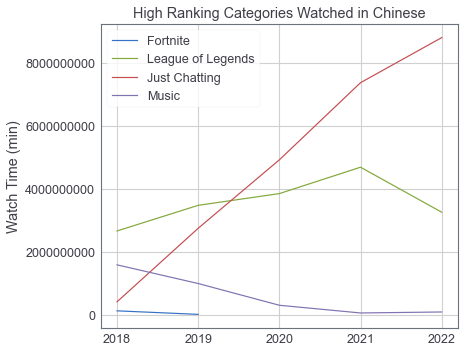

In [100]:
#grab yearly data for the chinese games
top1_cn = category_df[category_df['Game'] == 'Fortnite'].sort_values(by = "Year", ascending = False)
top1_cn = top1_cn.loc[top1_cn['Language'] == 'Chinese']

top2_cn = category_df[category_df['Game'] == 'League of Legends'].sort_values(by = "Year", ascending = False)
top2_cn = top2_cn.loc[top2_cn['Language'] == 'Chinese']

top3_cn = category_df[category_df['Game'] == 'Just Chatting'].sort_values(by = "Year", ascending = False)
top3_cn = top3_cn.loc[top3_cn['Language'] == 'Chinese']

top4_cn = category_df[category_df['Game'] == 'Music'].sort_values(by = "Year", ascending = False)
top4_cn = top4_cn.loc[top4_cn['Language'] == 'Chinese']

fig2, ax =plt.subplots(sharex= True)
ax.plot(top1_cn['Year'],top1_cn['Watch time (mins)'], label = 'Fortnite')
ax.plot(top2_cn['Year'],top2_cn['Watch time (mins)'], label = 'League of Legends')
ax.plot(top3_cn['Year'],top3_cn['Watch time (mins)'], label = 'Just Chatting')
ax.plot(top4_cn['Year'],top4_cn['Watch time (mins)'], label = 'Music')

ax.set_title('High Ranking Categories Watched in Chinese')
ax.set_ylabel('Watch Time (min)')
ax.ticklabel_format(style='plain')
ax.legend()
plt.xticks(top1_eng['Year'])
plt.show()

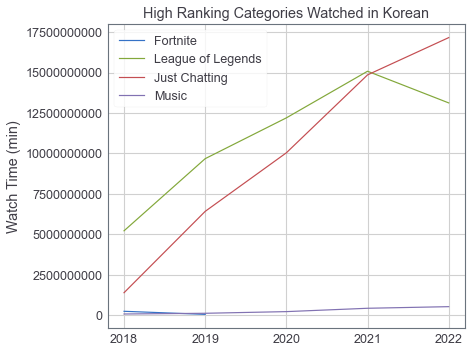

In [102]:
#grab yearly data for the Korean games
top1_kr = category_df[category_df['Game'] == 'Fortnite'].sort_values(by = "Year", ascending = False)
top1_kr = top1_kr.loc[top1_kr['Language'] == 'Korean']

top2_kr = category_df[category_df['Game'] == 'League of Legends'].sort_values(by = "Year", ascending = False)
top2_kr = top2_kr.loc[top2_kr['Language'] == 'Korean']

top3_kr = category_df[category_df['Game'] == 'Just Chatting'].sort_values(by = "Year", ascending = False)
top3_kr = top3_kr.loc[top3_kr['Language'] == 'Korean']

top4_kr = category_df[category_df['Game'] == 'Music'].sort_values(by = "Year", ascending = False)
top4_kr = top4_kr.loc[top4_kr['Language'] == 'Korean']

fig2, ax =plt.subplots(sharex= True)
ax.plot(top1_kr['Year'],top1_kr['Watch time (mins)'], label = 'Fortnite')
ax.plot(top2_kr['Year'],top2_kr['Watch time (mins)'], label = 'League of Legends')
ax.plot(top3_kr['Year'],top3_kr['Watch time (mins)'], label = 'Just Chatting')
ax.plot(top4_kr['Year'],top4_kr['Watch time (mins)'], label = 'Music')

ax.set_title('High Ranking Categories Watched in Korean')
ax.set_ylabel('Watch Time (min)')
ax.ticklabel_format(style='plain')
ax.legend()
plt.xticks(top1_eng['Year'])
plt.show()

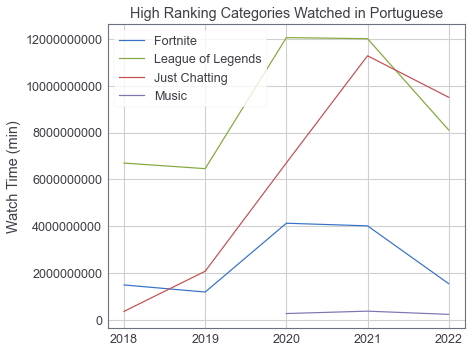

In [104]:
#grab yearly data for the Portuguese games
top1_pr = category_df[category_df['Game'] == 'Fortnite'].sort_values(by = "Year", ascending = False)
top1_pr = top1_pr.loc[top1_pr['Language'] == 'Portuguese']

top2_pr = category_df[category_df['Game'] == 'League of Legends'].sort_values(by = "Year", ascending = False)
top2_pr = top2_pr.loc[top2_pr['Language'] == 'Portuguese']

top3_pr = category_df[category_df['Game'] == 'Just Chatting'].sort_values(by = "Year", ascending = False)
top3_pr = top3_pr.loc[top3_pr['Language'] == 'Portuguese']

top4_pr = category_df[category_df['Game'] == 'Music'].sort_values(by = "Year", ascending = False)
top4_pr = top4_pr.loc[top4_pr['Language'] == 'Portuguese']

fig2, ax =plt.subplots(sharex= True)
ax.plot(top1_pr['Year'],top1_pr['Watch time (mins)'], label = 'Fortnite')
ax.plot(top2_pr['Year'],top2_pr['Watch time (mins)'], label = 'League of Legends')
ax.plot(top3_pr['Year'],top3_pr['Watch time (mins)'], label = 'Just Chatting')
ax.plot(top4_pr['Year'],top4_pr['Watch time (mins)'], label = 'Music')

ax.set_title('High Ranking Categories Watched in Portuguese')
ax.set_ylabel('Watch Time (min)')
ax.ticklabel_format(style='plain')
ax.legend()
plt.xticks(top1_eng['Year'])
plt.show()

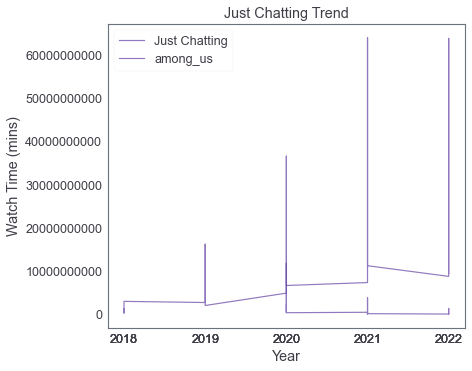

In [8]:
#isolate just chatting for all languages and years
just_chatting = category_df[category_df['Game'].str.contains('Just Chatting')].sort_values(by = "Year", ascending = False)
among_us = category_df[category_df['Game'].str.contains('Among Us')].sort_values(by = "Year", ascending = False)

plt.plot(just_chatting['Year'],just_chatting['Watch time (mins)'],
        label = 'Just Chatting',color = "#6441A5", alpha = 0.70)
plt.plot(among_us['Year'],among_us['Watch time (mins)'],
        label = 'among_us',color = "#6441A5", alpha = 0.70)

plt.title('Just Chatting Trend')
plt.xlabel('Year')
plt.ylabel('Watch Time (mins)')
plt.ticklabel_format(style='plain')
plt.legend()
plt.xticks(just_chatting['Year'])
plt.grid()
plt.show()